<a href="https://colab.research.google.com/github/pinkychow1010/DeepLearning_LocustPrediction/blob/main/JupyterNotebook/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook includes 4 sections: 


1.   Train, validation & test data
2.   Model creation and hyperparameter tuning
3.   Model Evaluation
4.   Unnecessary analysis




## Section 1
### Train, validation & test data

In [5]:
import pandas as pd
import io
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### Train data  
#### FLDAS, Landsat, SRTM

#### FLDAS data

In [6]:
# load train data
# select the "tmax_1980_2018.csv" from your local project drive
from google.colab import files
uploaded = files.upload()

df_data_train_98_99 = pd.read_csv(io.BytesIO(uploaded['FLDAS_98_99_extracted.csv']))

#dataset = dataframe.values
df_data_train_98_99.head(3)
print(df_data_train_98_99.shape)

Saving FLDAS_98_99_extracted.csv to FLDAS_98_99_extracted (1).csv
(2418, 26)


In [7]:
from google.colab import files
uploaded = files.upload()

df_data_train_00_01 = pd.read_csv(io.BytesIO(uploaded['FLDAS_00_01_extracted.csv']))

#dataset = dataframe.values
#df_data_train_00_01.head(3)
print(df_data_train_00_01.shape)

Saving FLDAS_00_01_extracted.csv to FLDAS_00_01_extracted (1).csv
(2390, 26)


In [8]:
from google.colab import files
uploaded = files.upload()

df_data_train_02_03 = pd.read_csv(io.BytesIO(uploaded['FLDAS_02_03_extracted.csv']))

#dataset = dataframe.values
df_data_train_02_03.head(3)
print(df_data_train_02_03.shape)

Saving FLDAS_02_03_extracted.csv to FLDAS_02_03_extracted (1).csv
(2548, 26)


In [9]:
from google.colab import files
uploaded = files.upload()

df_data_train_04 = pd.read_csv(io.BytesIO(uploaded['FLDAS_04_extracted.csv']))

#dataset = dataframe.values  
df_data_train_04.head(3)  
print(df_data_train_04.shape)  

Saving FLDAS_04_extracted.csv to FLDAS_04_extracted.csv
(17344, 26)


In [10]:
from google.colab import files
uploaded = files.upload()

df_data_train_05 = pd.read_csv(io.BytesIO(uploaded['FLDAS_05_extracted.csv']))

#dataset = dataframe.values
#df_data_train_05.head(3)
#print(df_data_train_05.shape)

Saving FLDAS_05_extracted.csv to FLDAS_05_extracted.csv


In [11]:
# combine train dataframes into one df
frames = [df_data_train_98_99, df_data_train_00_01, df_data_train_02_03, df_data_train_04, df_data_train_05]

train_df_fldas = pd.concat(frames)


# change the order of columns in pandas dataframe
train_df_fldas = train_df_fldas[["Unnamed: 0", "Month", "X", "Y", "Year", "evap", "heatnet",
       "humid", "id", "latheat", "prep", "pressure", "radtemp", "runoff",
       "soilheat", "soilmoi_10cm", "soilmoi_1m", "soilmoi_2m", "soilmoi_40cm",
       "soiltemp_10cm", "soiltemp_1m", "soiltemp_2m", "soiltemp_40cm","surfacetemp", "windspeed", "PRESENCE"]]


#print(train_df_fldas.info())

In [12]:
print(type(train_df_fldas))
print(len(train_df_fldas))
print(train_df_fldas.shape)
#train_df_fldas.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
26987
(26987, 26)


In [13]:
#sns.violinplot(data=train_df_fldas[['soilmoi_2m']])
train_df_fldas.columns

Index(['Unnamed: 0', 'Month', 'X', 'Y', 'Year', 'evap', 'heatnet', 'humid',
       'id', 'latheat', 'prep', 'pressure', 'radtemp', 'runoff', 'soilheat',
       'soilmoi_10cm', 'soilmoi_1m', 'soilmoi_2m', 'soilmoi_40cm',
       'soiltemp_10cm', 'soiltemp_1m', 'soiltemp_2m', 'soiltemp_40cm',
       'surfacetemp', 'windspeed', 'PRESENCE'],
      dtype='object')

In [14]:
# Divide train data to presence and absence to exclude 2-5 % of upper and lower outliers

train_df_fldas_presence = train_df_fldas[train_df_fldas['PRESENCE'] == 1]
train_df_fldas_absence = train_df_fldas[train_df_fldas['PRESENCE'] == 0]
train_df_fldas_presence.head(2)
#sns.violinplot(data=train_df_fldas_presence[['soilmoi_2m']])
#sns.violinplot(data=train_df_fldas_presence[['soilmoi_2m']])

,Unnamed: 0,Month,X,Y,Year,evap,heatnet,humid,id,latheat,prep,pressure,radtemp,runoff,soilheat,soilmoi_10cm,soilmoi_1m,soilmoi_2m,soilmoi_40cm,soiltemp_10cm,soiltemp_1m,soiltemp_2m,soiltemp_40cm,surfacetemp,windspeed,PRESENCE
99,2406,1,38.533,17.317,1998,0.000009,68.608475,0.012515,40221,22.448561,0.000014,97360.648438,297.968567,0.000001,-2.626832,0.241868,0.328349,0.324109,0.330645,298.107727,299.426208,300.359131,298.613708,296.056091,4.524924,1.0
100,2407,1,38.533,17.317,1998,0.000009,68.608475,0.012515,48390,22.448561,0.000014,97360.648438,297.968567,0.000001,-2.626832,0.241868,0.328349,0.324109,0.330645,298.107727,299.426208,300.359131,298.613708,296.056091,4.524924,1.0


In [15]:
# Percentage of presence and absence in train data
print ("Presence: %i (%.1f%%)"%(len(train_df_fldas_presence), float(len(train_df_fldas_presence))/len(train_df_fldas)*100.0))
print ("Absence: %i (%.1f%%)"%(len(train_df_fldas_absence), float(len(train_df_fldas_absence))/len(train_df_fldas)*100.0))
print ("Total: %i"%len(train_df_fldas))

Presence: 17428 (64.6%)
Absence: 9559 (35.4%)
Total: 26987


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log1p
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

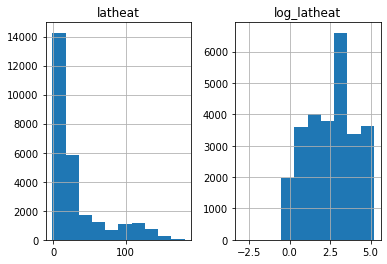

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [16]:
# Perform log transformation on "latheat", "evap" & "runoff" to deal with skewed data
# 'latheat'
dataset_train_fldas_latheat = np.log1p(train_df_fldas[['latheat']].values)
#print(type(dataset_train))


# Create a new dataframe to compare the original with log transform data
dist_df_latheat = pd.DataFrame({'latheat' : train_df_fldas['latheat'], 'log_latheat': dataset_train_fldas_latheat[:, 0]})

# Histogram plot original vs log transform data
plt.figure(figsize = (12,6))
dist_df_latheat.hist()

# 'evap'
dataset_train_fldas_evap = np.log1p(train_df_fldas[['evap']].values)
#print(type(dataset_train))


# Create a new dataframe to compare the original with log transform data
dist_df_evap = pd.DataFrame({'evap' : train_df_fldas['evap'], 'log_evap': dataset_train_fldas_evap[:, 0]})

# Histogram plot original vs log transform data
plt.figure(figsize = (12,6))
#dist_df_evap.hist()

# 'runoff'
dataset_train_fldas_runoff = np.log1p(train_df_fldas[['runoff']].values)
#print(type(dataset_train))


# Create a new dataframe to compare the original with log transform data
#dist_df_runoff = pd.DataFrame({'runoff' : train_df_fldas['runoff'], 'log_runoff': dataset_train_fldas_runoff[:, 0]})

# Histogram plot original vs log transform data
plt.figure(figsize = (12,6))
#dist_df_runoff.hist()

#### Landsat


In [17]:
from google.colab import files
uploaded = files.upload()

df_data_train_landsat_98_99 = pd.read_csv(io.BytesIO(uploaded['Landsat_98_99_extracted.csv']))

#dataset = dataframe.values
df_data_train_landsat_98_99.head(3)
print(df_data_train_landsat_98_99.shape)

Saving Landsat_98_99_extracted.csv to Landsat_98_99_extracted.csv
(1168, 13)


In [18]:
from google.colab import files
uploaded = files.upload()

df_data_train_landsat_00_01 = pd.read_csv(io.BytesIO(uploaded['Landsat_00_01_extracted.csv']))

#dataset = dataframe.values
df_data_train_landsat_00_01.head(3)
print(df_data_train_landsat_00_01.shape)

Saving Landsat_00_01_extracted.csv to Landsat_00_01_extracted.csv
(1587, 13)


In [19]:
from google.colab import files
uploaded = files.upload()

df_data_train_landsat_02_03 = pd.read_csv(io.BytesIO(uploaded['Landsat_02_03_extracted.csv']))

#dataset = dataframe.values
df_data_train_landsat_02_03.head(3)
print(df_data_train_landsat_02_03.shape)

Saving Landsat_02_03_extracted.csv to Landsat_02_03_extracted.csv
(1651, 13)


In [20]:
from google.colab import files
uploaded = files.upload()

df_data_train_landsat_04 = pd.read_csv(io.BytesIO(uploaded['Landsat_04_extracted.csv']))

#dataset = dataframe.values
df_data_train_landsat_04.head(3)
print(df_data_train_landsat_04.shape)

Saving Landsat_04_extracted.csv to Landsat_04_extracted.csv
(12712, 13)


In [21]:
from google.colab import files
uploaded = files.upload()

df_data_train_landsat_05 = pd.read_csv(io.BytesIO(uploaded['Landsat_05_extracted.csv']))

#dataset = dataframe.values
df_data_train_landsat_05.head(3)
print(df_data_train_landsat_05.shape)

Saving Landsat_05_extracted.csv to Landsat_05_extracted.csv
(1668, 13)


In [22]:
# combine landsat train dataframes into one df
frames_landsat = [df_data_train_landsat_98_99, df_data_train_landsat_00_01, df_data_train_landsat_02_03, df_data_train_landsat_04, df_data_train_landsat_05]

train_df_landsat = pd.concat(frames_landsat)

#### SRTM

In [23]:
# Load DEM data
from google.colab import files
uploaded = files.upload()

df_data_dem = pd.read_csv(io.BytesIO(uploaded['DEM_extracted.csv']))

#dataset = dataframe.values  
df_data_dem.head(3)  
print(df_data_dem.shape) 

Saving DEM_extracted.csv to DEM_extracted.csv
(69876, 6)


In [ ]:
print(type(df_data_dem))
df_data_dem.head(3)  

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,PRESENCE,X,Y,id,mean
0,0,0.0,19.969617,-2.284019,145,359.0
1,1,0.0,29.771012,0.631425,131,761.0
2,2,0.0,29.375540,19.856063,164,288.0


#### Combine data from different sources 
##### The join is done on 'id' as the common column

In [24]:
# train_df_landsat, train_df_fldas, df_data_dem
train_df_landsat = train_df_landsat[['Blue', 'Green', 'NIR', 'Red', 'SWIR1', 'SWIR2', 'X', 'Y', 'id']] #'PRESENCE', 'Year' ,'Month'
train_df_merge_fldas_landsat = pd.merge(train_df_fldas, train_df_landsat, on = 'id') #how='left', left_on=['X','Y'], right_on = ['X','Y']

print(train_df_merge_fldas_landsat.head(2))
print(train_df_merge_fldas_landsat.columns)


df_data_dem = df_data_dem[['X', 'Y', 'mean', 'id']]
train_df_merge_fldas_landsat_dem = pd.merge(train_df_merge_fldas_landsat, df_data_dem, on = 'id')# how='left', left_on=['X','Y'], right_on = ['X','Y']
print(train_df_merge_fldas_landsat_dem.head(2))
print(train_df_merge_fldas_landsat_dem.columns)


   Unnamed: 0  Month        X_x  ...        SWIR2        X_y        Y_y
0        1096      1  35.731989  ...  1092.198413  35.731989   3.470450
1        1101      1   0.073893  ...  4031.856574   0.073893  33.568867

[2 rows x 34 columns]
Index(['Unnamed: 0', 'Month', 'X_x', 'Y_x', 'Year', 'evap', 'heatnet', 'humid',
       'id', 'latheat', 'prep', 'pressure', 'radtemp', 'runoff', 'soilheat',
       'soilmoi_10cm', 'soilmoi_1m', 'soilmoi_2m', 'soilmoi_40cm',
       'soiltemp_10cm', 'soiltemp_1m', 'soiltemp_2m', 'soiltemp_40cm',
       'surfacetemp', 'windspeed', 'PRESENCE', 'Blue', 'Green', 'NIR', 'Red',
       'SWIR1', 'SWIR2', 'X_y', 'Y_y'],
      dtype='object')
   Unnamed: 0  Month        X_x  ...          X          Y    mean
0        1096      1  35.731989  ...  35.731989   3.470450   473.0
1        1101      1   0.073893  ...   0.073893  33.568867  1178.0

[2 rows x 37 columns]
Index(['Unnamed: 0', 'Month', 'X_x', 'Y_x', 'Year', 'evap', 'heatnet', 'humid',
       'id', 'latheat'

In [25]:
# move the "PRESENCE" column to the last one
train_df_merge_fldas_landsat_dem = train_df_merge_fldas_landsat_dem[['evap', 'heatnet', 'humid',
       'id', 'latheat', 'prep', 'pressure', 'radtemp', 'runoff', 'soilheat',
       'soilmoi_10cm', 'soilmoi_1m', 'soilmoi_2m', 'soilmoi_40cm',
       'soiltemp_10cm', 'soiltemp_1m', 'soiltemp_2m', 'soiltemp_40cm',
       'surfacetemp', 'windspeed', 'Blue', 'Green', 'NIR', 'Red',
       'SWIR1', 'SWIR2', 'mean','PRESENCE']] #'Unnamed: 0','Month', 'X', 'Y', 'Year', 

print(train_df_merge_fldas_landsat_dem.tail(2))
print(train_df_merge_fldas_landsat_dem.shape)

           evap   heatnet     humid  ...       SWIR2   mean  PRESENCE
18713  0.000048  8.988441  0.016091  ...  591.916335  574.0       0.0
18714  0.000048  8.988441  0.016091  ...  591.916335  574.0       0.0

[2 rows x 28 columns]
(18715, 28)


In [26]:
# check for NaN values in train and test dataframes
train_df_merge_fldas_landsat_dem.isnull().any()

# impute the data
train_df_merge_fldas_landsat_dem = train_df_merge_fldas_landsat_dem.fillna(train_df_merge_fldas_landsat_dem.median())#lambda x: x.median()

In [60]:
#rm(train_df_merge_fldas_landsat_dem)

/bin/bash: -c: line 0: syntax error near unexpected token `train_df_merge_fldas_landsat_dem'
/bin/bash: -c: line 0: `rm (train_df_merge_fldas_landsat_dem)'


#### Changing Features of numeric type (skewed distrib.)
##### log-transformation on "evap", "runoff" and "latheat"


###### 1. evap

In [27]:
 train_df_merge_fldas_landsat_dem['evap_log']= train_df_merge_fldas_landsat_dem['evap'].apply(np.log)

###### 2. runoff 

In [28]:
train_df_merge_fldas_landsat_dem['runoff_log']= train_df_merge_fldas_landsat_dem['runoff'].apply(np.log)

###### 3. latheat  

In [29]:
train_df_merge_fldas_landsat_dem['latheat_log']= train_df_merge_fldas_landsat_dem['latheat'].apply(np.log)

In [30]:
# impute the data
train_df_merge_fldas_landsat_dem = train_df_merge_fldas_landsat_dem.fillna(train_df_merge_fldas_landsat_dem.median())

In [31]:
# move the "PRESENCE" column to the last one and remove "id"
train_df_merge_fldas_landsat_dem = train_df_merge_fldas_landsat_dem[['evap_log', 'heatnet', 'humid',
       'latheat_log', 'prep', 'pressure', 'radtemp', 'runoff_log', 'soilheat',
       'soilmoi_10cm', 'soilmoi_1m', 'soilmoi_2m', 'soilmoi_40cm',
       'soiltemp_10cm', 'soiltemp_1m', 'soiltemp_2m', 'soiltemp_40cm',
       'surfacetemp', 'windspeed', 'Blue', 'Green', 'NIR', 'Red',
       'SWIR1', 'SWIR2', 'mean','PRESENCE']] #'id', 'Month', 'X', 'Y', 'Year', 

In [32]:
train_df_merge_fldas_landsat_dem = train_df_merge_fldas_landsat_dem.fillna(train_df_merge_fldas_landsat_dem.median()).clip(-1e11,1e11)

In [33]:
print(train_df_merge_fldas_landsat_dem.columns)

Index(['evap_log', 'heatnet', 'humid', 'latheat_log', 'prep', 'pressure',
       'radtemp', 'runoff_log', 'soilheat', 'soilmoi_10cm', 'soilmoi_1m',
       'soilmoi_2m', 'soilmoi_40cm', 'soiltemp_10cm', 'soiltemp_1m',
       'soiltemp_2m', 'soiltemp_40cm', 'surfacetemp', 'windspeed', 'Blue',
       'Green', 'NIR', 'Red', 'SWIR1', 'SWIR2', 'mean', 'PRESENCE'],
      dtype='object')


#### Check correlation with heatmap graph

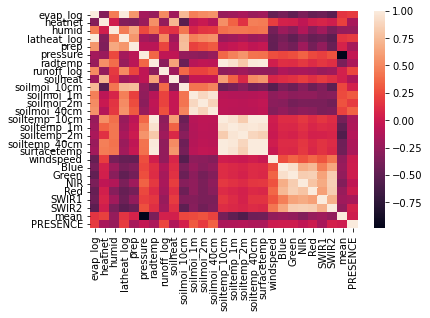

In [34]:
import seaborn as sns
corr = train_df_merge_fldas_landsat_dem.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [35]:
#dataset = train_df_merge_fldas_landsat_dem.values
dataset = train_df_merge_fldas_landsat_dem.to_numpy()
print(type(dataset))

# split into input (X) and output (Y) variables
X = dataset[:,0:26]
Y = dataset[:,26]
print(X.shape)
print(Y)

<class 'numpy.ndarray'>
(18715, 26)
[0. 0. 0. ... 0. 0. 0.]


[0 0 0 ... 0 0 0]


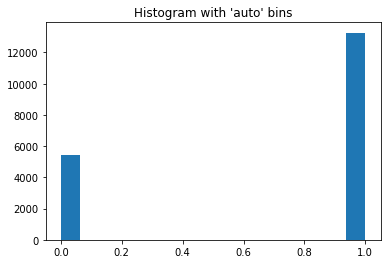

In [36]:
Y = Y.astype(int)
print(Y)
_ = plt.hist(Y, bins='auto')  # arguments are passed to np.histogram

plt.title("Histogram with 'auto' bins")
#Text(0.5, 1.0, "Histogram with 'auto' bins")

plt.show()

In [37]:
print(Y.ndim)
print(Y.shape)
print(train_df_merge_fldas_landsat_dem[['PRESENCE']])

1
(18715,)
       PRESENCE
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
...         ...
18710       0.0
18711       0.0
18712       0.0
18713       0.0
18714       0.0

[18715 rows x 1 columns]


In [38]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

### Validation data

In [39]:
# load validation data
# select the "tmax_1980_2018.csv" from your local project drive
from google.colab import files
uploaded = files.upload()

df_data_val = pd.read_csv(io.BytesIO(uploaded['FLDAS_06_07_extracted.csv']))

#dataset = dataframe.values
df_data_val.head(2)
print(df_data_val.shape)

Saving FLDAS_06_07_extracted.csv to FLDAS_06_07_extracted.csv
(2839, 26)


In [40]:
df_data_val.columns

Index(['Unnamed: 0', 'Month', 'PRESENCE', 'X', 'Y', 'Year', 'evap', 'heatnet',
       'humid', 'id', 'latheat', 'prep', 'pressure', 'radtemp', 'runoff',
       'soilheat', 'soilmoi_10cm', 'soilmoi_1m', 'soilmoi_2m', 'soilmoi_40cm',
       'soiltemp_10cm', 'soiltemp_1m', 'soiltemp_2m', 'soiltemp_40cm',
       'surfacetemp', 'windspeed'],
      dtype='object')

In [41]:
# Change the order of columns in pandas df to have "PRESENCE" as the last col
df_data_val = df_data_val[["Month", "X", "Y", "Year", "evap", "heatnet",
       "humid", "id", "latheat", "prep", "pressure", "radtemp", "runoff",
       "soilheat", "soilmoi_10cm", "soilmoi_1m", "soilmoi_2m", "soilmoi_40cm",
       "soiltemp_10cm", "soiltemp_1m", "soiltemp_2m", "soiltemp_40cm","surfacetemp", "windspeed", "PRESENCE"]]# 


In [42]:
print(df_data_val.head(2))
print(df_data_val.shape)
#print(df_data_val.info())

   Month          X          Y  ...  surfacetemp  windspeed  PRESENCE
0      1  21.384989  -0.281897  ...   300.521423   2.289917       0.0
1      1  36.557216  16.060265  ...   298.687592   6.868981       0.0

[2 rows x 25 columns]
(2839, 25)


In [43]:
df_data_val.describe().transpose()
#len(df_data_val)

,count,mean,std,min,25%,50%,75%,max
Month,2839.0,6.856640,3.564104,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01,12.000000
X,2839.0,18.649586,16.216305,-1.662118e+01,7.085231e+00,2.034771e+01,3.326788e+01,49.628811
Y,2839.0,14.737187,11.424770,-1.191785e+01,6.826402e+00,1.731075e+01,2.303427e+01,36.745027
Year,2839.0,2006.577316,0.494073,2.006000e+03,2.006000e+03,2.007000e+03,2.007000e+03,2007.000000
evap,2839.0,0.000015,0.000020,-2.301517e-07,4.243267e-07,3.458980e-06,3.000919e-05,0.000072
heatnet,2839.0,56.842540,38.600993,-2.803090e+01,2.418934e+01,5.568921e+01,8.298677e+01,176.265305
humid,2839.0,0.009301,0.004670,1.777293e-03,4.785058e-03,9.276419e-03,1.365306e-02,0.018755
id,2839.0,31169.158859,11669.466969,2.520000e+04,2.591050e+04,2.662300e+04,2.733350e+04,69202.000000
latheat,2839.0,37.547384,49.074036,-5.756093e-01,1.061241e+00,8.650908e+00,7.505299e+01,180.976532
prep,2839.0,0.000018,0.000031,0.000000e+00,0.000000e+00,2.435070e-06,2.217668e-05,0.000228


In [44]:
# divide validation data to presence and absence to exclude 2-5 % of upper and lower outliers
df_data_val_presence = df_data_val[df_data_val['PRESENCE'] == 1]
df_data_val_absence = df_data_val[df_data_val['PRESENCE'] == 0]
df_data_val_absence.head(2)

,Month,X,Y,Year,evap,heatnet,humid,id,latheat,prep,pressure,radtemp,runoff,soilheat,soilmoi_10cm,soilmoi_1m,soilmoi_2m,soilmoi_40cm,soiltemp_10cm,soiltemp_1m,soiltemp_2m,soiltemp_40cm,surfacetemp,windspeed,PRESENCE
0,1,21.384989,-0.281897,2006,5.991438e-05,-0.872525,0.015506,25239,149.845856,0.000065,96397.65625,298.997528,5.876605e-06,0.64746,0.411574,0.42046,0.436016,0.414271,298.905762,298.359406,298.134247,298.557770,300.521423,2.289917,0.0
1,1,36.557216,16.060265,2006,5.806991e-07,64.039223,0.008563,25204,1.452328,0.000000,95336.40625,300.164062,5.769270e-12,-1.63430,0.145005,0.32994,0.331969,0.329165,300.277191,301.167755,301.835480,300.690979,298.687592,6.868981,0.0


In [45]:
# Percentage of presence and absence in test data
print ("Presence: %i (%.1f%%)"%(len(df_data_val_presence), float(len(df_data_val_presence))/len(df_data_val)*100.0))
print ("Absence: %i (%.1f%%)"%(len(df_data_val_absence), float(len(df_data_val_absence))/len(df_data_val)*100.0))
print ("Total: %i"%len(df_data_val))

Presence: 444 (15.6%)
Absence: 2395 (84.4%)
Total: 2839


In [46]:
from google.colab import files
uploaded = files.upload()

df_data_val_landsat_06_07 = pd.read_csv(io.BytesIO(uploaded['Landsat_06_07_extracted.csv']))

#dataset = dataframe.values
df_data_val_landsat_06_07.head(2)
print(df_data_val_landsat_06_07.shape)

Saving Landsat_06_07_extracted.csv to Landsat_06_07_extracted.csv
(1810, 13)


In [47]:
# df_data_val_landsat_06_07, df_data_val, df_data_dem
val_df_landsat = df_data_val_landsat_06_07[['Blue', 'Green', 'NIR', 'Red', 'SWIR1', 'SWIR2', 'X', 'Y', 'id']] #'PRESENCE', 'Year' ,'Month'
val_df_merge_fldas_landsat = pd.merge(df_data_val, val_df_landsat, on = 'id') #how='left', left_on=['X','Y'], right_on = ['X','Y']

print(val_df_merge_fldas_landsat.head(2))
print(val_df_merge_fldas_landsat.columns)

df_data_dem = df_data_dem[['X', 'Y', 'mean', 'id']]
val_df_merge_fldas_landsat_dem = pd.merge(val_df_merge_fldas_landsat, df_data_dem, on = 'id')# how='left', left_on=['X','Y'], right_on = ['X','Y']
print(val_df_merge_fldas_landsat_dem.head(2))
print(val_df_merge_fldas_landsat_dem.columns)

   Month        X_x        Y_x  ...        SWIR2        X_y        Y_y
0      1  36.557216  16.060265  ...  2863.392000  36.557216  16.060265
1      1  40.222654   7.432943  ...   780.242063  40.222654   7.432943

[2 rows x 33 columns]
Index(['Month', 'X_x', 'Y_x', 'Year', 'evap', 'heatnet', 'humid', 'id',
       'latheat', 'prep', 'pressure', 'radtemp', 'runoff', 'soilheat',
       'soilmoi_10cm', 'soilmoi_1m', 'soilmoi_2m', 'soilmoi_40cm',
       'soiltemp_10cm', 'soiltemp_1m', 'soiltemp_2m', 'soiltemp_40cm',
       'surfacetemp', 'windspeed', 'PRESENCE', 'Blue', 'Green', 'NIR', 'Red',
       'SWIR1', 'SWIR2', 'X_y', 'Y_y'],
      dtype='object')
   Month        X_x        Y_x  Year  ...        Y_y          X          Y    mean
0      1  36.557216  16.060265  2006  ...  16.060265  36.557216  16.060265   493.0
1      1  40.222654   7.432943  2006  ...   7.432943  40.222654   7.432943  2084.0

[2 rows x 36 columns]
Index(['Month', 'X_x', 'Y_x', 'Year', 'evap', 'heatnet', 'humid', 'id',

In [48]:
# move the "PRESENCE" column to the last one
val_df_merge_fldas_landsat_dem = val_df_merge_fldas_landsat_dem[['evap', 'heatnet', 'humid',
       'latheat', 'prep', 'pressure', 'radtemp', 'runoff', 'soilheat',
       'soilmoi_10cm', 'soilmoi_1m', 'soilmoi_2m', 'soilmoi_40cm',
       'soiltemp_10cm', 'soiltemp_1m', 'soiltemp_2m', 'soiltemp_40cm',
       'surfacetemp', 'windspeed', 'Blue', 'Green', 'NIR', 'Red',
       'SWIR1', 'SWIR2', 'mean','PRESENCE']] #'Unnamed: 0', 'id', 'Month', 'X', 'Y', 'Year', 

print(val_df_merge_fldas_landsat_dem.tail(2))
print(val_df_merge_fldas_landsat_dem.shape)

          evap    heatnet     humid  ...        SWIR2   mean  PRESENCE
1806  0.000001  81.211723  0.014092  ...  2163.334661   37.0       1.0
1807  0.000013  -1.305877  0.003731  ...  3818.438735  627.0       0.0

[2 rows x 27 columns]
(1808, 27)


In [49]:
# check for NaN values in train and test dataframes
val_df_merge_fldas_landsat_dem.isnull().any()

# impute the data
val_df_merge_fldas_landsat_dem = val_df_merge_fldas_landsat_dem.fillna(val_df_merge_fldas_landsat_dem.median())

In [50]:
#val_df_merge_fldas_landsat_dem.isnull().any()
#print(val_df_merge_fldas_landsat_dem.shape)

#### Log tranform on validation data for "evap", "runoff", "latheat"

In [51]:
 val_df_merge_fldas_landsat_dem['evap_log']= val_df_merge_fldas_landsat_dem['evap'].apply(np.log)

In [52]:
val_df_merge_fldas_landsat_dem['runoff_log']= val_df_merge_fldas_landsat_dem['runoff'].apply(np.log)

In [53]:
val_df_merge_fldas_landsat_dem['latheat_log']= val_df_merge_fldas_landsat_dem['latheat'].apply(np.log)

In [54]:
# impute the data
val_df_merge_fldas_landsat_dem = val_df_merge_fldas_landsat_dem.fillna(val_df_merge_fldas_landsat_dem.median())

In [55]:
# move the "PRESENCE" column to the last one
val_df_merge_fldas_landsat_dem = val_df_merge_fldas_landsat_dem[['evap_log', 'heatnet', 'humid',
       'latheat_log', 'prep', 'pressure', 'radtemp', 'runoff_log', 'soilheat',
       'soilmoi_10cm', 'soilmoi_1m', 'soilmoi_2m', 'soilmoi_40cm',
       'soiltemp_10cm', 'soiltemp_1m', 'soiltemp_2m', 'soiltemp_40cm',
       'surfacetemp', 'windspeed', 'Blue', 'Green', 'NIR', 'Red',
       'SWIR1', 'SWIR2', 'mean','PRESENCE']] #'id', 'Month', 'X', 'Y', 'Year', 

In [56]:
val_df_merge_fldas_landsat_dem = val_df_merge_fldas_landsat_dem.fillna(val_df_merge_fldas_landsat_dem.median()).clip(-1e11,1e11)

In [134]:
#rm(val_df_merge_fldas_landsat_dem)
#a =2

In [57]:
#print(val_df_merge_fldas_landsat_dem.info())
print(val_df_merge_fldas_landsat_dem.shape)

(1808, 27)


In [58]:
dataset_val = val_df_merge_fldas_landsat_dem.values
print(type(dataset_val))
print(dataset_val.size)

# split into input (X) and output (Y) variables
X_val = dataset_val[:,0:26]
Y_val = dataset_val[:,26]
Y_val
#print(X_val.shape)
#print(Y_val) 

<class 'numpy.ndarray'>
48816


array([0., 0., 0., ..., 1., 1., 0.])

In [59]:
Y_val = Y_val.astype(int)

In [60]:
# encode class values as integers
encoder_val = LabelEncoder()
encoder_val.fit(Y_val) 
encoded_Y_val = encoder_val.transform(Y_val)

In [61]:
#print(X_val.size)
#X_val

### Train_new & Val_new

In [62]:
tv_frames = [train_df_merge_fldas_landsat_dem, val_df_merge_fldas_landsat_dem]
tv_new = pd.concat(tv_frames)
tv_new.head(2)

,evap_log,heatnet,humid,latheat_log,prep,pressure,radtemp,runoff_log,soilheat,soilmoi_10cm,soilmoi_1m,soilmoi_2m,soilmoi_40cm,soiltemp_10cm,soiltemp_1m,soiltemp_2m,soiltemp_40cm,surfacetemp,windspeed,Blue,Green,NIR,Red,SWIR1,SWIR2,mean,PRESENCE
0,-12.173651,119.128960,0.014811,2.55855,0.000005,95705.359375,302.899567,-16.444806,1.246766,0.202167,0.312230,0.307770,0.312708,302.830627,302.213257,301.765289,302.570862,299.943359,6.886012,796.285714,1172.329365,1851.488095,1327.222222,1573.500000,1092.198413,473.0,0.0
1,-11.942462,4.174149,0.004427,2.78974,0.000006,88644.242188,279.236481,-15.782495,-3.765432,0.283599,0.318301,0.323309,0.311076,279.421295,281.684265,283.677917,280.183350,279.670135,6.322828,1070.948207,1809.454183,3534.836653,2750.888446,4557.131474,4031.856574,1178.0,0.0


In [63]:
tv_new.shape

(20523, 27)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05e83288d0>,
      dtype=object)

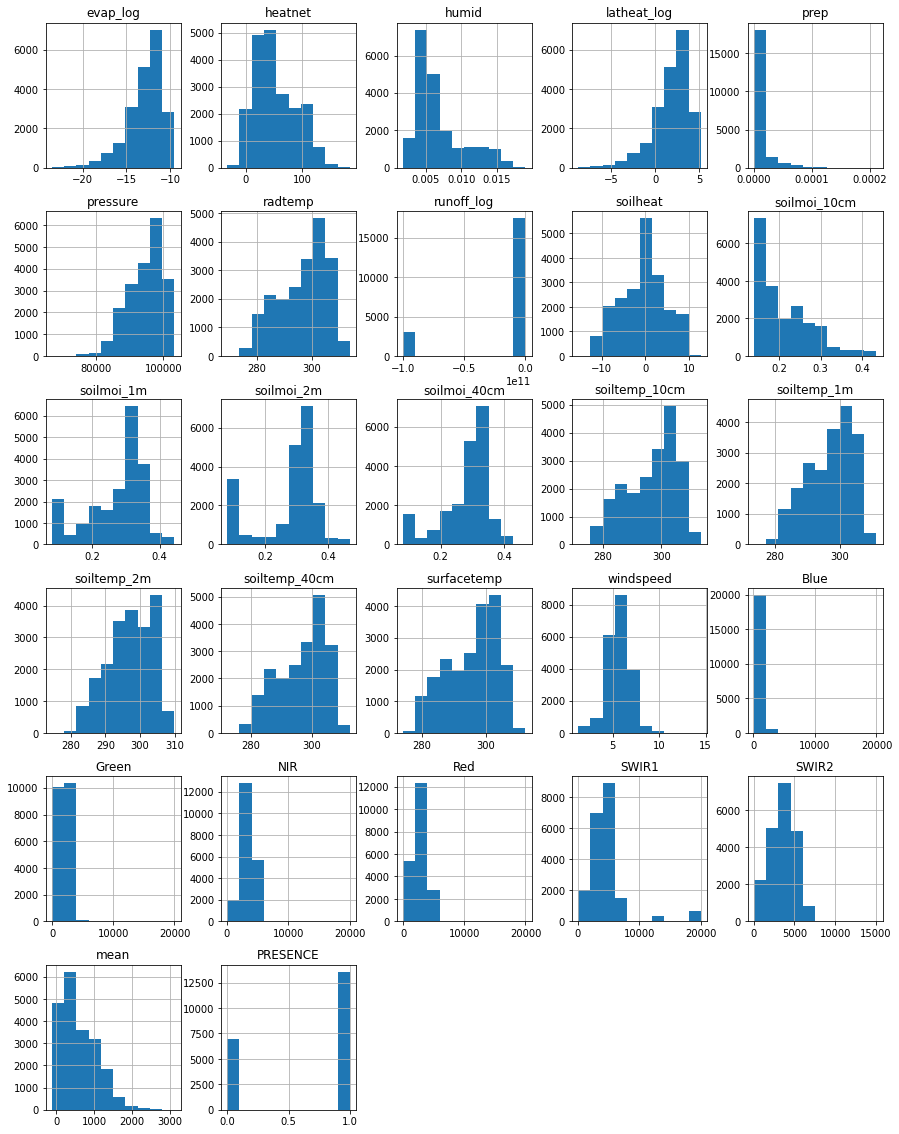

In [64]:
# check the distribution of each column using histogram
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
tv_new.hist(ax = ax)

In [65]:
dataset_new_tv = tv_new.values
print(type(dataset_new_tv))
print(dataset_new_tv.size)

# split into input (X) and output (Y) variables
X_new_tv = dataset_new_tv[:,0:26]
Y_new_tv = dataset_new_tv[:,26]

<class 'numpy.ndarray'>
554121


In [66]:
# split the new combined data (train and validation ) with 70 %, 30% proportions
from sklearn.model_selection import train_test_split

train_new_X, val_new_X, train_new_y, val_new_y = train_test_split(X_new_tv, Y_new_tv,
                                                    test_size=0.3,
                                                    random_state=123, 
                                                    #stratify=y
                                                    )

print(train_new_X)

[[-1.04883002e+01  4.62759323e+01  1.81671176e-02 ...  2.27989243e+03
   1.17998805e+03  2.40000000e+01]
 [-9.85889221e+00  1.29687538e+01  1.55984042e-02 ...  1.21071713e+03
   4.55533864e+02  4.35000000e+02]
 [-1.30234487e+01  5.54511642e+01  7.29128905e-03 ...  2.09062698e+03
   1.63661905e+03  7.14000000e+02]
 ...
 [-1.42701649e+01  3.47534332e+01  3.40295373e-03 ...  5.89355159e+03
   5.01252778e+03  3.72000000e+02]
 [-1.14222409e+01  9.20344353e+00  4.20614751e-03 ...  7.67083333e+02
   6.43994048e+02  8.24000000e+02]
 [-9.93648385e+00 -2.10795355e+00  1.58923753e-02 ...  2.69668526e+03
   1.76849801e+03  2.98000000e+02]]


In [67]:
# encode class values as integers
encoder_train_new = LabelEncoder()
encoder_train_new.fit(train_new_y)
encoded_train_new_Y = encoder_train_new.transform(train_new_y)

In [68]:
# encode class values as integers
encoder_val_new = LabelEncoder()
encoder_val_new.fit(val_new_y)
encoded_val_new_Y = encoder_train_new.transform(val_new_y)

### Test data

In [69]:
# load test data
# select the "tmax_1980_2018.csv" from your local project drive
from google.colab import files
uploaded = files.upload()

df_data_test = pd.read_csv(io.BytesIO(uploaded['FLDAS_10_11_extracted.csv']))

#dataset = dataframe.values
df_data_test.head(3)
print(df_data_test.shape)

Saving FLDAS_10_11_extracted.csv to FLDAS_10_11_extracted.csv
(2501, 26)


In [70]:
df_data_test.columns

Index(['Unnamed: 0', 'Month', 'PRESENCE', 'X', 'Y', 'Year', 'evap', 'heatnet',
       'humid', 'id', 'latheat', 'prep', 'pressure', 'radtemp', 'runoff',
       'soilheat', 'soilmoi_10cm', 'soilmoi_1m', 'soilmoi_2m', 'soilmoi_40cm',
       'soiltemp_10cm', 'soiltemp_1m', 'soiltemp_2m', 'soiltemp_40cm',
       'surfacetemp', 'windspeed'],
      dtype='object')

In [71]:
# Change the order of columns in pandas df to have "PRESENCE" as the last col
df_data_test = df_data_test[["Month", "X", "Y", "Year", "evap", "heatnet",
       "humid", "id", "latheat", "prep", "pressure", "radtemp", "runoff",
       "soilheat", "soilmoi_10cm", "soilmoi_1m", "soilmoi_2m", "soilmoi_40cm",
       "soiltemp_10cm", "soiltemp_1m", "soiltemp_2m", "soiltemp_40cm","surfacetemp", "windspeed", "PRESENCE"]]


In [72]:
print(df_data_test.head(2))
print(df_data_test.shape)
#print(df_data_test.info())

   Month          X          Y  ...  surfacetemp  windspeed  PRESENCE
0      1  22.977782   8.294751  ...   299.809662   5.166034       0.0
1      1   3.417286  28.594087  ...   287.979553   6.197610       0.0

[2 rows x 25 columns]
(2501, 25)


In [73]:
df_data_test.describe().transpose()
len(df_data_test)

2501

In [74]:
# divide test data to presence and absence to exclude 2-5 % of upper and lower outliers
df_data_test_presence = df_data_test[df_data_test['PRESENCE'] == 1]
df_data_test_absence = df_data_test[df_data_test['PRESENCE'] == 0]
df_data_test_absence.head(2)

,Month,X,Y,Year,evap,heatnet,humid,id,latheat,prep,pressure,radtemp,runoff,soilheat,soilmoi_10cm,soilmoi_1m,soilmoi_2m,soilmoi_40cm,soiltemp_10cm,soiltemp_1m,soiltemp_2m,soiltemp_40cm,surfacetemp,windspeed,PRESENCE
0,1,22.977782,8.294751,2010,5.837062e-06,94.003792,0.006183,30000,14.598494,0.0,92378.000000,301.950378,0.0,3.135654,0.159769,0.389519,0.398845,0.385400,301.583771,299.438660,298.589569,300.229584,299.809662,5.166034,0.0
1,1,3.417286,28.594087,2010,4.943250e-07,28.490023,0.003265,30001,1.236307,0.0,95231.046875,287.705688,0.0,-3.034967,0.158402,0.080000,0.080000,0.118378,287.926056,290.024445,292.021393,288.686218,287.979553,6.197610,0.0


In [75]:
# Percentage of presence and absence in test data
print ("Presence: %i (%.1f%%)"%(len(df_data_test_presence), float(len(df_data_test_presence))/len(df_data_test)*100.0))
print ("Absence: %i (%.1f%%)"%(len(df_data_test_absence), float(len(df_data_test_absence))/len(df_data_test)*100.0))
print ("Total: %i"%len(df_data_test))

Presence: 108 (4.3%)
Absence: 2393 (95.7%)
Total: 2501


In [76]:
from google.colab import files
uploaded = files.upload()

df_data_test_landsat_10_11 = pd.read_csv(io.BytesIO(uploaded['Landsat_10_11_extracted.csv']))

#dataset = dataframe.values
df_data_test_landsat_10_11.head(2)
print(df_data_test_landsat_10_11.shape)

Saving Landsat_10_11_extracted.csv to Landsat_10_11_extracted.csv
(1397, 13)


In [77]:
# df_data_test_landsat_10_11, df_data_test, df_data_dem
test_df_landsat = df_data_test_landsat_10_11[['Blue', 'Green', 'NIR', 'Red', 'SWIR1', 'SWIR2', 'X', 'Y', 'id']] #'PRESENCE', 'Year' ,'Month'
test_df_merge_fldas_landsat = pd.merge(df_data_test, test_df_landsat, on = 'id') #how='left', left_on=['X','Y'], right_on = ['X','Y']

print(test_df_merge_fldas_landsat.head(2))
print(test_df_merge_fldas_landsat.columns)

df_data_dem = df_data_dem[['X', 'Y', 'mean', 'id']]
test_df_merge_fldas_landsat_dem = pd.merge(test_df_merge_fldas_landsat, df_data_dem, on = 'id')# how='left', left_on=['X','Y'], right_on = ['X','Y']
print(test_df_merge_fldas_landsat_dem.head(2))
print(test_df_merge_fldas_landsat_dem.columns)

   Month        X_x        Y_x  ...        SWIR2        X_y        Y_y
0      1  22.977782   8.294751  ...  1194.484000  22.977782   8.294751
1      1   3.417286  28.594087  ...  4293.418327   3.417286  28.594087

[2 rows x 33 columns]
Index(['Month', 'X_x', 'Y_x', 'Year', 'evap', 'heatnet', 'humid', 'id',
       'latheat', 'prep', 'pressure', 'radtemp', 'runoff', 'soilheat',
       'soilmoi_10cm', 'soilmoi_1m', 'soilmoi_2m', 'soilmoi_40cm',
       'soiltemp_10cm', 'soiltemp_1m', 'soiltemp_2m', 'soiltemp_40cm',
       'surfacetemp', 'windspeed', 'PRESENCE', 'Blue', 'Green', 'NIR', 'Red',
       'SWIR1', 'SWIR2', 'X_y', 'Y_y'],
      dtype='object')
   Month        X_x        Y_x  Year  ...        Y_y          X          Y   mean
0      1  22.977782   8.294751  2010  ...   8.294751  22.977782   8.294751  856.0
1      1   3.417286  28.594087  2010  ...  28.594087   3.417286  28.594087  551.0

[2 rows x 36 columns]
Index(['Month', 'X_x', 'Y_x', 'Year', 'evap', 'heatnet', 'humid', 'id',
  

In [78]:
# move the "PRESENCE" column to the last one
test_df_merge_fldas_landsat_dem = test_df_merge_fldas_landsat_dem[['evap', 'heatnet', 'humid',
        'latheat', 'prep', 'pressure', 'radtemp', 'runoff', 'soilheat',
       'soilmoi_10cm', 'soilmoi_1m', 'soilmoi_2m', 'soilmoi_40cm',
       'soiltemp_10cm', 'soiltemp_1m', 'soiltemp_2m', 'soiltemp_40cm',
       'surfacetemp', 'windspeed', 'Blue', 'Green', 'NIR', 'Red',
       'SWIR1', 'SWIR2', 'mean','PRESENCE']] #'Unnamed: 0', 'id', 'Month', 'X', 'Y', 'Year',

print(test_df_merge_fldas_landsat_dem.tail(2))
print(test_df_merge_fldas_landsat_dem.shape)

          evap    heatnet     humid  ...       SWIR2    mean  PRESENCE
1390  0.000023  87.305443  0.011945  ...  1100.89243   620.0       0.0
1391  0.000042  29.251736  0.013829  ...  2690.12749  1102.0       0.0

[2 rows x 27 columns]
(1392, 27)


In [79]:
# check for NaN values in train and test dataframes
test_df_merge_fldas_landsat_dem.isnull().any()

# impute the data
test_df_merge_fldas_landsat_dem = test_df_merge_fldas_landsat_dem.fillna(test_df_merge_fldas_landsat_dem.median())#lambda x: x.median())

In [80]:
#test_df_merge_fldas_landsat_dem.isnull().any()
#rm(test_df_merge_fldas_landsat_dem)
#rm(test_df_merge_fldas_landsat_dem)

#### Log tranform on test data for "evap", "runoff", "latheat"

In [81]:
 test_df_merge_fldas_landsat_dem['evap_log']= test_df_merge_fldas_landsat_dem['evap'].apply(np.log)

In [82]:
test_df_merge_fldas_landsat_dem['runoff_log']= test_df_merge_fldas_landsat_dem['runoff'].apply(np.log)

In [83]:
test_df_merge_fldas_landsat_dem['latheat_log']= test_df_merge_fldas_landsat_dem['latheat'].apply(np.log)

In [84]:
#  impute the data
test_df_merge_fldas_landsat_dem = test_df_merge_fldas_landsat_dem.fillna(test_df_merge_fldas_landsat_dem.median())

In [85]:
# move the "PRESENCE" column to the last one
test_df_merge_fldas_landsat_dem = test_df_merge_fldas_landsat_dem[['evap_log', 'heatnet', 'humid',
        'latheat_log', 'prep', 'pressure', 'radtemp', 'runoff_log', 'soilheat',
       'soilmoi_10cm', 'soilmoi_1m', 'soilmoi_2m', 'soilmoi_40cm',
       'soiltemp_10cm', 'soiltemp_1m', 'soiltemp_2m', 'soiltemp_40cm',
       'surfacetemp', 'windspeed', 'Blue', 'Green', 'NIR', 'Red',
       'SWIR1', 'SWIR2', 'mean','PRESENCE']] #'id', 'Month', 'X', 'Y', 'Year',

In [86]:
test_df_merge_fldas_landsat_dem = test_df_merge_fldas_landsat_dem.fillna(test_df_merge_fldas_landsat_dem.median()).clip(-1e11,1e11)

In [87]:
#print(test_df_merge_fldas_landsat_dem.info())

In [88]:
dataset_test = test_df_merge_fldas_landsat_dem.values
print(type(dataset_test))
print(dataset_test.size)

# split into input (X) and output (Y) variables
X_test = dataset_test[:,0:26]
Y_test = dataset_test[:,26]
Y_test
#print(X_test.shape)
#print(Y_test) 

<class 'numpy.ndarray'>
37584


array([0., 0., 0., ..., 0., 0., 0.])

In [89]:
Y_test = Y_test.astype(int)

In [90]:
# encode class values as integers
encoder_test = LabelEncoder()
encoder_test.fit(Y_test) 
encoded_Y_test = encoder_test.transform(Y_test)

In [91]:
#print(X.size)
X_test 

array([[-1.20512830e+01,  9.40037918e+01,  6.18330156e-03, ...,
         1.74822800e+03,  1.19448400e+03,  8.56000000e+02],
       [-1.45200727e+01,  2.84900227e+01,  3.26459971e-03, ...,
         5.67280279e+03,  4.29341833e+03,  5.51000000e+02],
       [-1.33911888e+01,  1.17049614e+02,  1.07889539e-02, ...,
         3.89746200e+03,  3.53162000e+03,  1.80000000e+02],
       ...,
       [-1.17428084e+01, -3.54882598e+00,  4.64060111e-03, ...,
         5.47752966e+03,  4.94187712e+03,  6.98000000e+02],
       [-1.06900717e+01,  8.73054428e+01,  1.19451135e-02, ...,
         2.05273307e+03,  1.10089243e+03,  6.20000000e+02],
       [-1.00864609e+01,  2.92517357e+01,  1.38289845e-02, ...,
         3.37087649e+03,  2.69012749e+03,  1.10200000e+03]])

## Section 2

> Model creation and hyperparameter tuning



### Base_Model 




In [92]:
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(26, input_dim=26, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', 
	              metrics=['accuracy'])
	return model

In [93]:
base_model = create_baseline()
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 26)                702       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 27        
Total params: 729
Trainable params: 729
Non-trainable params: 0
_________________________________________________________________


In [182]:
#train_new_X.shape

(14366, 26)

In [183]:
# evaluate model with standardized dataset 
# 3' time with accu: 93.14%, 10 epochs and batch_size = 20
# 1' 47 seconds accu: 93.31%,
# 1' 56' accu: 92.48%
# 1' 39", epochs=10, accu: 75.66% (The difference with the previous results is removing a column called "id" in the train, validation and test data)
# 3' 2", epochs = 20, accu:77.78% (5.12%)(The difference with the previous results is removing a column called "id" in the train, validation and test data)
# 14' 24" epochs = 60 , accu : 80.00% (5.10%)(The difference with the previous results is removing a column called "id" in the train, validation and test data)
# 16' 44" epochs = 60 , accu : 77.90% (6.00%) (5.10%)(The difference with the previous results is removing a column called "id" in data & using encoded_train_new_y instead of train_new_y for cross validation)]'
# 14' 26": epochs = 60, 78.30% (4.11%)
# epochs : 60, acc: 79.81% (4.67%)
# new data(X,Y,month,year removed: eppoch = 60, accu: Baseline: 68.93% (9.94%))

estimator = KerasClassifier(build_fn=create_baseline, epochs=60, batch_size=20, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, train_new_X, encoded_train_new_Y, cv=kfold) #train_new_X, val_new_X, train_new_y, val_new_y
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Baseline: 68.93% (9.94%)


In [ ]:
#encoded_train_new_Y

array([0, 0, 1, ..., 1, 1, 0])

In [94]:
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=26, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', 
	              metrics=['accuracy'])
	return model

In [103]:
smaller_model = create_smaller()
smaller_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 13)                351       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 14        
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# smaller model
#(new log_transformed train and test data: 30 epochs, 20' time and accuracy: 100%)
# 60 epochs, accu:70.76% (5.58%) time: 57' 
from keras.wrappers.scikit_learn import KerasClassifier

def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=26, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

#estimators = []
#estimators.append(('standardize', StandardScaler()))# "StandardScaler" can not be used bc many of features do no have normal distribution
#estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=60, batch_size=5, verbose=0)))
#pipeline = Pipeline(estimators)

estimator = KerasClassifier(build_fn=create_smaller, epochs=60, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, train_new_X, encoded_train_new_Y, cv=kfold)# X, encoded_Y
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smaller: 70.76% (5.58%)


In [101]:
def create_larger():
	# create model
	model = Sequential()
	model.add(Dense(26, input_dim=26, activation='relu'))
	model.add(Dense(13, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [102]:
larger_model = create_larger()
larger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_7 (Dense)              (None, 13)                351       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 14        
Total params: 1,067
Trainable params: 1,067
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# time:19' , accuracy(sd):  100.00% (0.00%)
# time: , accuracy: , 
# larger model
def create_larger():
	# create model
	model = Sequential()
	model.add(Dense(26, input_dim=26, activation='relu'))
	model.add(Dense(13, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

#estimators = []
#estimators.append(('standardize', StandardScaler()))
#estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=30, batch_size=5, verbose=0)))
#pipeline = Pipeline(estimators)
estimator = KerasClassifier(build_fn=create_larger, epochs=60, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, train_new_X, encoded_train_new_Y, cv=kfold)#X, encoded_Y
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 68.21% (5.15%)


#### Train the model

In [ ]:
EPOCHS = 50
BATCH_SIZE = 20

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',#'val_prc', 
    verbose = 1,
    patience = 10,
    mode = 'max',
    restore_best_weights = True)


In [ ]:
base_model = create_baseline()
#model.load_weights(initial_weights)
baseline_history = base_model.fit(
    x = train_new_X,#X, 
    y = encoded_train_new_Y,#Y,#encoded_Y,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [early_stopping],
    validation_data = (val_new_X, val_new_y))# (X_val, Y_val)# encoded_Y_val


Epoch 1/50
719/719 [==============================] - 2s 2ms/step - loss: 18286198.0000 - accuracy: 0.8895 - val_loss: 4319578.5000 - val_accuracy: 0.9068
Epoch 2/50
719/719 [==============================] - 2s 2ms/step - loss: 8693589.0000 - accuracy: 0.9288 - val_loss: 5541875.5000 - val_accuracy: 0.9368
Epoch 3/50
719/719 [==============================] - 2s 2ms/step - loss: 11347966.0000 - accuracy: 0.9270 - val_loss: 3533570.0000 - val_accuracy: 0.9378
Epoch 4/50
719/719 [==============================] - 2s 2ms/step - loss: 6998716.0000 - accuracy: 0.9282 - val_loss: 2999156.5000 - val_accuracy: 0.9100
Epoch 5/50
719/719 [==============================] - 1s 2ms/step - loss: 8666818.0000 - accuracy: 0.9291 - val_loss: 5858154.0000 - val_accuracy: 0.9384
Epoch 6/50
719/719 [==============================] - 2s 2ms/step - loss: 8269050.0000 - accuracy: 0.9299 - val_loss: 635456.5000 - val_accuracy: 0.9100
Epoch 7/50
719/719 [==============================] - 2s 2ms/step - loss: 8

#### Check training history

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'accuracy']#['loss', 'prc', 'precision', 'recall'] , 'val_loss', 'val_accuracy'
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()


In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


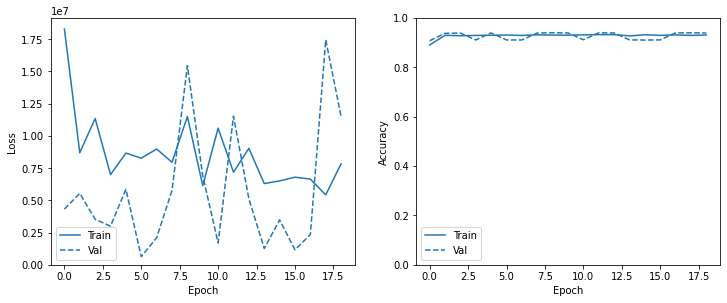

In [ ]:
history_dict = baseline_history.history
print(history_dict.keys())
plot_metrics(baseline_history)

 ### Linear method

#### Logistic Regression

In [184]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(train_new_X, encoded_train_new_Y)  #(X, Y)
Y_pred = logreg.predict(val_new_X)#(X_test)
acc_log = round(logreg.score(train_new_X, encoded_train_new_Y) * 100, 2)
acc_log 

70.16

### Instance methods

#### Support Vector Machines

In [185]:
# Support Vector Machines
svc = SVC()
svc.fit(train_new_X, encoded_train_new_Y)#(X, Y)
Y_pred = svc.predict(val_new_X)
acc_svc = round(svc.score(train_new_X, encoded_train_new_Y) * 100, 2)
acc_svc 

69.34

#### KNN

In [186]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_new_X, encoded_train_new_Y)#(X, Y)
Y_pred = knn.predict(val_new_X)
acc_knn = round(knn.score(train_new_X, encoded_train_new_Y) * 100, 2)
acc_knn

94.86

### Gaussian Naive Bayes

In [187]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train_new_X, encoded_train_new_Y)#(X, Y)
Y_pred = gaussian.predict(val_new_X)
acc_gaussian = round(gaussian.score(train_new_X, encoded_train_new_Y) * 100, 2)
acc_gaussian

69.34

### Other neural network methods

#### Perceptron
##### Linear machine learning algorithm for binary classification, 
##### One of the simplest types of artificial neural networks


In [188]:
# Perceptron

perceptron = Perceptron(max_iter=1000)# default: max_iter=1000
perceptron.fit(train_new_X, encoded_train_new_Y)#(X, Y)
Y_pred = perceptron.predict(val_new_X)
acc_perceptron = round(perceptron.score(train_new_X, encoded_train_new_Y) * 100, 2)
acc_perceptron

55.79

In [189]:
# Evaluate a perceptron model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold


# Define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate model
scores = cross_val_score(perceptron, train_new_X, encoded_train_new_Y, scoring='accuracy', cv=cv, n_jobs=-1)

# Summarize result
print('Mean Accuracy of Perceptron: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy of Perceptron: 0.597 (0.069)


##### Tune Perceptron Hyperparameters


In [190]:
# define grid
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

###### 'eta0' parameter

In [191]:
# grid search learning rate for the perceptron
from sklearn.model_selection import GridSearchCV

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define search
search = GridSearchCV(perceptron, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(train_new_X, encoded_train_new_Y) #(X, Y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Mean Accuracy: 0.597
Config: {'eta0': 0.0001}
>0.597 with: {'eta0': 0.0001}
>0.597 with: {'eta0': 0.001}
>0.597 with: {'eta0': 0.01}
>0.597 with: {'eta0': 0.1}
>0.597 with: {'eta0': 1.0}


###### 'max_iter' parameter

In [192]:
# define grid
grid = dict()
grid['max_iter'] = [1, 10, 100, 1000, 10000]

In [193]:
# grid search total epochs for the perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


# define model
model = Perceptron(eta0=0.0001)

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['max_iter'] = [1, 10, 100, 1000, 10000]

# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(train_new_X, encoded_train_new_Y) #(X, Y)

# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Mean Accuracy: 0.598
Config: {'max_iter': 10}
>0.568 with: {'max_iter': 1}
>0.598 with: {'max_iter': 10}
>0.597 with: {'max_iter': 100}
>0.597 with: {'max_iter': 1000}
>0.597 with: {'max_iter': 10000}


##### Hyperparameter tuning for Perceptron model:
###### 'max_iter' should be at least 100. For our dataset changing 'eta0' did not make any tangible difference to the accuracy result

### Linear SVC

In [194]:
linear_svc = LinearSVC()
linear_svc.fit(train_new_X, encoded_train_new_Y)#(X, Y)
Y_pred = linear_svc.predict(val_new_X)
acc_linear_svc = round(linear_svc.score(train_new_X, encoded_train_new_Y) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


67.53

### Stochastic Gradient Descent

In [195]:
sgd = SGDClassifier()
sgd.fit(train_new_X, encoded_train_new_Y) #(X, Y)
Y_pred = sgd.predict(val_new_X)
acc_sgd = round(sgd.score(train_new_X, encoded_train_new_Y) * 100, 2)
acc_sgd

66.93

### Tree method

#### Decision Tree

In [196]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_new_X, encoded_train_new_Y) #(X, Y)
Y_pred = decision_tree.predict(val_new_X)
acc_decision_tree = round(decision_tree.score(train_new_X, encoded_train_new_Y) * 100, 2)
acc_decision_tree

100.0

#### Random Forest

In [197]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_new_X, encoded_train_new_Y) #(X, Y)
Y_pred = random_forest.predict(val_new_X)
random_forest.score(train_new_X, encoded_train_new_Y)
acc_random_forest = round(random_forest.score(train_new_X, encoded_train_new_Y) * 100, 2)
acc_random_forest

100.0

### Comparison of methods 

In [198]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
1,KNN,94.86
2,Logistic Regression,70.16
0,Support Vector Machines,69.34
4,Naive Bayes,69.34
7,Linear SVC,67.53
6,Stochastic Gradient Decent,66.93
5,Perceptron,55.79


## Section 3 


> Model Evaluation



#### Keras Classification Metrics for "base_model"


> Binary Accuracy: "binary_accuracy", "acc"



##### "accuracy" of base_model with plot

Epoch 1/100
719/719 - 2s - loss: 30692278.0000 - accuracy: 0.6133
Epoch 2/100
719/719 - 2s - loss: 17962654.0000 - accuracy: 0.6448
Epoch 3/100
719/719 - 2s - loss: 16480279.0000 - accuracy: 0.6774
Epoch 4/100
719/719 - 2s - loss: 16236005.0000 - accuracy: 0.6620
Epoch 5/100
719/719 - 2s - loss: 15162973.0000 - accuracy: 0.6837
Epoch 6/100
719/719 - 2s - loss: 11314794.0000 - accuracy: 0.6755
Epoch 7/100
719/719 - 2s - loss: 15689437.0000 - accuracy: 0.6834
Epoch 8/100
719/719 - 2s - loss: 14549974.0000 - accuracy: 0.6797
Epoch 9/100
719/719 - 2s - loss: 14741437.0000 - accuracy: 0.6886
Epoch 10/100
719/719 - 2s - loss: 12429133.0000 - accuracy: 0.6928
Epoch 11/100
719/719 - 2s - loss: 13085159.0000 - accuracy: 0.6806
Epoch 12/100
719/719 - 2s - loss: 13528988.0000 - accuracy: 0.7015
Epoch 13/100
719/719 - 2s - loss: 17884604.0000 - accuracy: 0.6866
Epoch 14/100
719/719 - 2s - loss: 13153723.0000 - accuracy: 0.6986
Epoch 15/100
719/719 - 2s - loss: 12601237.0000 - accuracy: 0.6914
Epoc

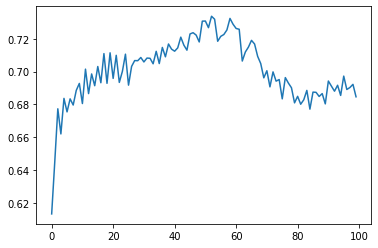

In [199]:
# train model
history = base_model.fit(train_new_X, encoded_train_new_Y, epochs=100, batch_size=20, verbose=2)

# plot metrics
plt.plot(history.history['accuracy'])
plt.show()

Epoch 1/100
449/449 - 2s - loss: 5959500.5000 - accuracy: 0.6849 - val_loss: 20444680.0000 - val_accuracy: 0.7616
Epoch 2/100
449/449 - 2s - loss: 8445264.0000 - accuracy: 0.6907 - val_loss: 17630208.0000 - val_accuracy: 0.7476
Epoch 3/100
449/449 - 2s - loss: 6050497.0000 - accuracy: 0.7053 - val_loss: 1969769.3750 - val_accuracy: 0.7293
Epoch 4/100
449/449 - 2s - loss: 5441246.5000 - accuracy: 0.6959 - val_loss: 4675329.0000 - val_accuracy: 0.4426
Epoch 5/100
449/449 - 2s - loss: 7052047.0000 - accuracy: 0.6914 - val_loss: 2592911.7500 - val_accuracy: 0.3963
Epoch 6/100
449/449 - 2s - loss: 8260319.5000 - accuracy: 0.6914 - val_loss: 17413440.0000 - val_accuracy: 0.6951
Epoch 7/100
449/449 - 2s - loss: 5890868.5000 - accuracy: 0.6934 - val_loss: 6169932.5000 - val_accuracy: 0.7700
Epoch 8/100
449/449 - 1s - loss: 7486308.0000 - accuracy: 0.6928 - val_loss: 1846855.1250 - val_accuracy: 0.7798
Epoch 9/100
449/449 - 1s - loss: 7083940.5000 - accuracy: 0.6948 - val_loss: 542578.8125 - va

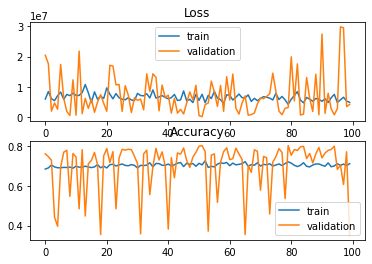

In [200]:
# fit model
history = base_model.fit(train_new_X, encoded_train_new_Y, validation_data=(val_new_X, encoded_val_new_Y), epochs=100, verbose=2)

# evaluate the model
_, train_acc = base_model.evaluate(train_new_X, encoded_train_new_Y, verbose=0)
_, test_acc = base_model.evaluate(val_new_X, encoded_val_new_Y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

##### Other model metrics for binary classification


> Precision
    
>  Recall

> F1 Score




In [202]:
# Calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

 
# define and fit the model
# create model(same as "base_model")
model = Sequential()
model.add(Dense(26, input_dim=26, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', 
	              metrics=['accuracy'])
# fit model
model.fit(train_new_X, encoded_train_new_Y, epochs=100, verbose=2)


# predict probabilities for test set
yhat_probs = model.predict(val_new_X, verbose=2)

# predict crisp classes for test set
yhat_classes= np.where(yhat_probs > 0.5, 1,0)
#yhat_classes = model.predict_classes(val_new_X, verbose=2)


# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(encoded_val_new_Y, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(encoded_val_new_Y, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(encoded_val_new_Y, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(encoded_val_new_Y, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(encoded_val_new_Y, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(encoded_val_new_Y, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(encoded_val_new_Y, yhat_classes)
print(matrix)

Epoch 1/100
449/449 - 2s - loss: 145547104.0000 - accuracy: 0.6203
Epoch 2/100
449/449 - 1s - loss: 14097431.0000 - accuracy: 0.6665
Epoch 3/100
449/449 - 1s - loss: 9835221.0000 - accuracy: 0.6615
Epoch 4/100
449/449 - 1s - loss: 7221694.5000 - accuracy: 0.6562
Epoch 5/100
449/449 - 1s - loss: 9316782.0000 - accuracy: 0.6666
Epoch 6/100
449/449 - 1s - loss: 10326459.0000 - accuracy: 0.6840
Epoch 7/100
449/449 - 1s - loss: 8745934.0000 - accuracy: 0.6665
Epoch 8/100
449/449 - 1s - loss: 7615531.0000 - accuracy: 0.6938
Epoch 9/100
449/449 - 1s - loss: 9614409.0000 - accuracy: 0.6764
Epoch 10/100
449/449 - 1s - loss: 8558832.0000 - accuracy: 0.6843
Epoch 11/100
449/449 - 1s - loss: 8863995.0000 - accuracy: 0.6947
Epoch 12/100
449/449 - 1s - loss: 10281953.0000 - accuracy: 0.6891
Epoch 13/100
449/449 - 1s - loss: 11651978.0000 - accuracy: 0.7001
Epoch 14/100
449/449 - 1s - loss: 7021544.0000 - accuracy: 0.6838
Epoch 15/100
449/449 - 1s - loss: 8062975.0000 - accuracy: 0.7007
Epoch 16/100


### Keras Classification Metrics for "smaller model"

Epoch 1/100
719/719 - 2s - loss: 51974704.0000 - accuracy: 0.6203
Epoch 2/100
719/719 - 2s - loss: 6623778.5000 - accuracy: 0.6299
Epoch 3/100
719/719 - 2s - loss: 6220869.0000 - accuracy: 0.6327
Epoch 4/100
719/719 - 2s - loss: 7450174.5000 - accuracy: 0.6194
Epoch 5/100
719/719 - 2s - loss: 8721312.0000 - accuracy: 0.6197
Epoch 6/100
719/719 - 2s - loss: 6502764.5000 - accuracy: 0.6207
Epoch 7/100
719/719 - 2s - loss: 8493941.0000 - accuracy: 0.6192
Epoch 8/100
719/719 - 2s - loss: 9102112.0000 - accuracy: 0.6254
Epoch 9/100
719/719 - 2s - loss: 6954816.0000 - accuracy: 0.6261
Epoch 10/100
719/719 - 2s - loss: 6014583.5000 - accuracy: 0.6331
Epoch 11/100
719/719 - 2s - loss: 7101293.5000 - accuracy: 0.6307
Epoch 12/100
719/719 - 2s - loss: 5863632.0000 - accuracy: 0.6357
Epoch 13/100
719/719 - 2s - loss: 7201904.0000 - accuracy: 0.6278
Epoch 14/100
719/719 - 2s - loss: 7533817.5000 - accuracy: 0.6259
Epoch 15/100
719/719 - 2s - loss: 6307841.5000 - accuracy: 0.6321
Epoch 16/100
719/7

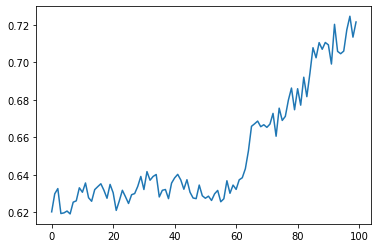

In [205]:
# train model
history = smaller_model.fit(train_new_X, encoded_train_new_Y, epochs=100, batch_size=20, verbose=2)

# plot metrics
plt.plot(history.history['accuracy'])
plt.show()

Epoch 1/100
449/449 - 2s - loss: 1577204.7500 - accuracy: 0.7273 - val_loss: 9102.5684 - val_accuracy: 0.7582
Epoch 2/100
449/449 - 2s - loss: 1303348.6250 - accuracy: 0.7283 - val_loss: 2014047.6250 - val_accuracy: 0.7479
Epoch 3/100
449/449 - 2s - loss: 1532724.6250 - accuracy: 0.7285 - val_loss: 1956875.7500 - val_accuracy: 0.7799
Epoch 4/100
449/449 - 1s - loss: 1463853.8750 - accuracy: 0.7405 - val_loss: 324313.9062 - val_accuracy: 0.7738
Epoch 5/100
449/449 - 1s - loss: 1360431.0000 - accuracy: 0.7256 - val_loss: 1051204.1250 - val_accuracy: 0.6290
Epoch 6/100
449/449 - 2s - loss: 2077847.8750 - accuracy: 0.7193 - val_loss: 1343819.0000 - val_accuracy: 0.7494
Epoch 7/100
449/449 - 2s - loss: 1248202.1250 - accuracy: 0.7268 - val_loss: 467846.5938 - val_accuracy: 0.6750
Epoch 8/100
449/449 - 2s - loss: 1128975.3750 - accuracy: 0.7148 - val_loss: 172993.3125 - val_accuracy: 0.7731
Epoch 9/100
449/449 - 1s - loss: 942175.5625 - accuracy: 0.7231 - val_loss: 653917.6875 - val_accuracy

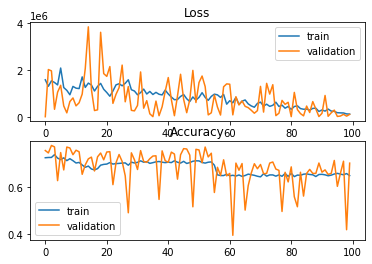

In [206]:
# fit model
history = smaller_model.fit(train_new_X, encoded_train_new_Y, validation_data=(val_new_X, encoded_val_new_Y), epochs=100, verbose=2)

# evaluate the model
_, train_acc = smaller_model.evaluate(train_new_X, encoded_train_new_Y, verbose=0)
_, test_acc = smaller_model.evaluate(val_new_X, encoded_val_new_Y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

##### Other model metrics for binary classification


> Precision
    
>  Recall

> F1 Score




In [96]:
# Calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

 
# define and fit the model
# create model(same as "smaller_model")
model = Sequential()
model.add(Dense(13, input_dim=26, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
model.fit(train_new_X, encoded_train_new_Y, epochs=100, verbose=2)


# predict probabilities for test set
yhat_probs = model.predict(val_new_X, verbose=2)

# predict crisp classes for test set
yhat_classes= np.where(yhat_probs > 0.5, 1,0)
#yhat_classes = model.predict_classes(val_new_X, verbose=2)


# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(encoded_val_new_Y, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(encoded_val_new_Y, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(encoded_val_new_Y, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(encoded_val_new_Y, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(encoded_val_new_Y, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(encoded_val_new_Y, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(encoded_val_new_Y, yhat_classes)
print(matrix)

Epoch 1/100
449/449 - 1s - loss: 64999060.0000 - accuracy: 0.5808
Epoch 2/100
449/449 - 0s - loss: 6324917.0000 - accuracy: 0.6357
Epoch 3/100
449/449 - 0s - loss: 7353407.0000 - accuracy: 0.6458
Epoch 4/100
449/449 - 0s - loss: 7270602.5000 - accuracy: 0.6556
Epoch 5/100
449/449 - 0s - loss: 9928806.0000 - accuracy: 0.6543
Epoch 6/100
449/449 - 0s - loss: 8067624.5000 - accuracy: 0.6650
Epoch 7/100
449/449 - 0s - loss: 8550967.0000 - accuracy: 0.6718
Epoch 8/100
449/449 - 0s - loss: 5769288.5000 - accuracy: 0.6781
Epoch 9/100
449/449 - 0s - loss: 6157513.5000 - accuracy: 0.6833
Epoch 10/100
449/449 - 0s - loss: 7841641.5000 - accuracy: 0.6829
Epoch 11/100
449/449 - 0s - loss: 8240761.5000 - accuracy: 0.6719
Epoch 12/100
449/449 - 0s - loss: 7060189.5000 - accuracy: 0.6913
Epoch 13/100
449/449 - 0s - loss: 6659981.5000 - accuracy: 0.6913
Epoch 14/100
449/449 - 0s - loss: 6294085.5000 - accuracy: 0.6827
Epoch 15/100
449/449 - 0s - loss: 5681717.0000 - accuracy: 0.6965
Epoch 16/100
449/4

### Keras Classification Metrics for "larger_model"


> Binary Accuracy: "binary_accuracy", "acc"



Epoch 1/100
719/719 - 1s - loss: 16460446.0000 - accuracy: 0.6076
Epoch 2/100
719/719 - 1s - loss: 12199262.0000 - accuracy: 0.6082
Epoch 3/100
719/719 - 1s - loss: 13493353.0000 - accuracy: 0.6132
Epoch 4/100
719/719 - 1s - loss: 9278641.0000 - accuracy: 0.6241
Epoch 5/100
719/719 - 1s - loss: 9241537.0000 - accuracy: 0.6385
Epoch 6/100
719/719 - 1s - loss: 9094384.0000 - accuracy: 0.6542
Epoch 7/100
719/719 - 1s - loss: 8486858.0000 - accuracy: 0.6606
Epoch 8/100
719/719 - 1s - loss: 8854817.0000 - accuracy: 0.6774
Epoch 9/100
719/719 - 1s - loss: 7396016.0000 - accuracy: 0.6792
Epoch 10/100
719/719 - 1s - loss: 6450915.0000 - accuracy: 0.6878
Epoch 11/100
719/719 - 1s - loss: 7049186.5000 - accuracy: 0.6712
Epoch 12/100
719/719 - 1s - loss: 5990588.0000 - accuracy: 0.6817
Epoch 13/100
719/719 - 1s - loss: 4501119.0000 - accuracy: 0.6895
Epoch 14/100
719/719 - 1s - loss: 4267641.5000 - accuracy: 0.6932
Epoch 15/100
719/719 - 1s - loss: 4638203.0000 - accuracy: 0.7060
Epoch 16/100
719

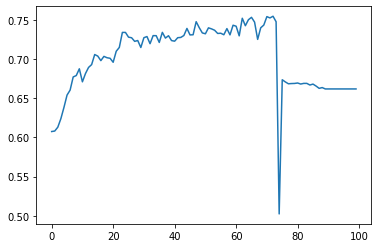

In [104]:
# train model
history = larger_model.fit(train_new_X, encoded_train_new_Y, epochs=100, batch_size=20, verbose=2)

# plot metrics
plt.plot(history.history['accuracy'])
plt.show()

Epoch 1/100
449/449 - 1s - loss: 0.6395 - accuracy: 0.6620 - val_loss: 0.6408 - val_accuracy: 0.6602
Epoch 2/100
449/449 - 1s - loss: 0.6395 - accuracy: 0.6620 - val_loss: 0.6408 - val_accuracy: 0.6602
Epoch 3/100
449/449 - 1s - loss: 0.6395 - accuracy: 0.6620 - val_loss: 0.6408 - val_accuracy: 0.6602
Epoch 4/100
449/449 - 1s - loss: 0.6395 - accuracy: 0.6620 - val_loss: 0.6408 - val_accuracy: 0.6602
Epoch 5/100
449/449 - 1s - loss: 0.6395 - accuracy: 0.6620 - val_loss: 0.6408 - val_accuracy: 0.6602
Epoch 6/100
449/449 - 1s - loss: 0.6395 - accuracy: 0.6620 - val_loss: 0.6408 - val_accuracy: 0.6602
Epoch 7/100
449/449 - 1s - loss: 0.6395 - accuracy: 0.6620 - val_loss: 0.6408 - val_accuracy: 0.6602
Epoch 8/100
449/449 - 1s - loss: 0.6395 - accuracy: 0.6620 - val_loss: 0.6408 - val_accuracy: 0.6602
Epoch 9/100
449/449 - 1s - loss: 0.6395 - accuracy: 0.6620 - val_loss: 0.6408 - val_accuracy: 0.6602
Epoch 10/100
449/449 - 1s - loss: 0.6395 - accuracy: 0.6620 - val_loss: 0.6408 - val_accura

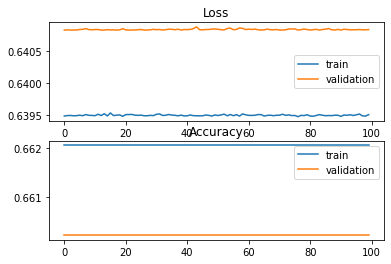

In [105]:
# fit model
history = larger_model.fit(train_new_X, encoded_train_new_Y, validation_data=(val_new_X, encoded_val_new_Y), epochs=100, verbose=2)

# evaluate the model
_, train_acc = larger_model.evaluate(train_new_X, encoded_train_new_Y, verbose=0)
_, test_acc = larger_model.evaluate(val_new_X, encoded_val_new_Y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

##### Other model metrics for binary classification


> Precision
    
>  Recall

> F1 Score




In [106]:
# Calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

 
# define and fit the model
# create model(same as "larger_model")
model = Sequential()
model.add(Dense(26, input_dim=26, activation='relu'))
model.add(Dense(13, input_dim=26, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
model.fit(train_new_X, encoded_train_new_Y, epochs=100, verbose=2)


# predict probabilities for test set
yhat_probs = model.predict(val_new_X, verbose=2)

# predict crisp classes for test set
yhat_classes= np.where(yhat_probs > 0.5, 1,0)
#yhat_classes = model.predict_classes(val_new_X, verbose=2)


# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(encoded_val_new_Y, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(encoded_val_new_Y, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(encoded_val_new_Y, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(encoded_val_new_Y, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(encoded_val_new_Y, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(encoded_val_new_Y, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(encoded_val_new_Y, yhat_classes)
print(matrix)

Epoch 1/100
449/449 - 1s - loss: 12519673.0000 - accuracy: 0.5957
Epoch 2/100
449/449 - 1s - loss: 11028881.0000 - accuracy: 0.6318
Epoch 3/100
449/449 - 1s - loss: 9616370.0000 - accuracy: 0.6517
Epoch 4/100
449/449 - 1s - loss: 11117170.0000 - accuracy: 0.6633
Epoch 5/100
449/449 - 1s - loss: 11521835.0000 - accuracy: 0.6773
Epoch 6/100
449/449 - 1s - loss: 12048169.0000 - accuracy: 0.6765
Epoch 7/100
449/449 - 1s - loss: 11861035.0000 - accuracy: 0.6762
Epoch 8/100
449/449 - 1s - loss: 15305853.0000 - accuracy: 0.6540
Epoch 9/100
449/449 - 1s - loss: 14306691.0000 - accuracy: 0.6616
Epoch 10/100
449/449 - 1s - loss: 9958095.0000 - accuracy: 0.6699
Epoch 11/100
449/449 - 1s - loss: 9380273.0000 - accuracy: 0.6776
Epoch 12/100
449/449 - 1s - loss: 9392195.0000 - accuracy: 0.6662
Epoch 13/100
449/449 - 1s - loss: 9040830.0000 - accuracy: 0.6852
Epoch 14/100
449/449 - 1s - loss: 9192370.0000 - accuracy: 0.6721
Epoch 15/100
449/449 - 1s - loss: 8417121.0000 - accuracy: 0.6777
Epoch 16/10

### Save the base_model

In [107]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [108]:
#! pip install torchvision 

In [109]:
#import torch
#import torchvision

#model_save_name = 'base_model_binary_clf.pt'
#path = F"/content/gdrive/My Drive/{model_save_name}" 
#torch.save(base_model, path)
#torch.save(base_model.state_dict(), path)

In [110]:

#model_save_name = 'base_model_binary_clf.pt'
#path = F"/content/gdrive/My Drive/{model_save_name}"
#the_model = torch.load(PATH)
#model.load_state_dict(torch.load(path))

## Section 4 


> Unnecessary analysis



### Grid Search Hyperparameters

####  Tune Batch Size and Number of Epochs
###### {'batch_size': 20, 'epochs': 10} & {'batch_size': 40, 'epochs': 100} had the best accurac

In [ ]:
# Use scikit-learn to grid search the batch size and epochs
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(30, input_dim=30, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
	return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Based on results of this cell: 0.942470 (0.058475) with: {'batch_size': 20, 'epochs': 10} had the best accuracy, {'batch_size': 40, 'epochs': 100} had the same acc:0.942939%

KeyboardInterrupt: ignored

#### Tune the Training Optimization Algorithm
##### result of the following cell: Only optimizers with more than 80% accuracy will be mentioned in this cell:

> 0.880131 (0.086107) with: {'optimizer': 'Adam'}

> 0.879369 (0.085561) with: {'optimizer': 'RMSprop'}

> 0.878665 (0.087346) with: {'optimizer': 'Adamax'}


> 0.868987 (0.071495) with: {'optimizer': 'Nadam'}


> 0.781666 (0.187239) with: {'optimizer': 'Adagrad'}


In [ ]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Dense(30, input_dim=30, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=20, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.880131 using {'optimizer': 'Adam'}
0.718096 (0.347545) with: {'optimizer': 'SGD'}
0.879369 (0.085561) with: {'optimizer': 'RMSprop'}
0.781666 (0.187239) with: {'optimizer': 'Adagrad'}
0.524779 (0.242486) with: {'optimizer': 'Adadelta'}
0.880131 (0.086107) with: {'optimizer': 'Adam'}
0.878665 (0.087346) with: {'optimizer': 'Adamax'}
0.868987 (0.071495) with: {'optimizer': 'Nadam'}


#### Tune Learning Rate and Momentum
##### The odd part about the result of the following cell:
###### With the introduced learning rate and momentum, the accuracy result does not change much(stays flat around 71 to 72 %)
###### Best: 0.728125 using {'learn_rate': 0.01, 'momentum': 0.9}

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
#from tensorflow.keras.optimizers import RMSprop

# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
	# create model
	model = Sequential()
	model.add(Dense(30, input_dim=30, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	optimizer = SGD(lr=learn_rate, momentum=momentum)
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=20, verbose=0)

# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Best: 0.728125 using {'learn_rate': 0.01, 'momentum': 0.9}
0.718917 (0.346385) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.718096 (0.347545) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.718096 (0.347545) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.718096 (0.347545) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.718096 (0.347545) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.718096 (0.347545) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.718096 (0.347545) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.718096 (0.347545) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.718038 (0.347506) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.718096 (0.347545) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.718096 (0.347545) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.728125 (0.333374) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.718096 (0.347545) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.718096 (0.347545) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.718096 (0.347545) with: {'learn_rate': 

#### Tune Network Weight Initialization
##### the result of following cell; only higher than 90% is shown in this cells

> Best: 0.942001 using {'init_mode': 'he_uniform'}


> 0.913674 (0.090315) with: {'init_mode': 'normal'}









In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
	# create model
	model = Sequential()
	model.add(Dense(30, input_dim=30, kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy']) # optimizer='adam'
	return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=20, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.942001 using {'init_mode': 'he_uniform'}
0.881011 (0.085286) with: {'init_mode': 'uniform'}
0.870160 (0.071540) with: {'init_mode': 'lecun_uniform'}
0.913674 (0.090315) with: {'init_mode': 'normal'}
0.718096 (0.347545) with: {'init_mode': 'zero'}
0.880600 (0.085026) with: {'init_mode': 'glorot_normal'}
0.879193 (0.086342) with: {'init_mode': 'glorot_uniform'}
0.869690 (0.071485) with: {'init_mode': 'he_normal'}
0.942001 (0.058368) with: {'init_mode': 'he_uniform'}


#### Tune the Neuron Activation Function for the first layer
##### Results higher than 87% are depicted in this cell:

> Best: 0.881011 using {'activation': 'relu'}

> 0.880835 (0.085478) with: {'activation': 'softplus'}

> 0.870218 (0.071472) with: {'activation': 'softsign'}

> 0.876143 (0.085282) with: {'activation': 'linear'}












In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(30, input_dim=30, kernel_initializer='uniform', activation=activation))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=20, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.881011 using {'activation': 'relu'}
0.663790 (0.313515) with: {'activation': 'softmax'}
0.880835 (0.085478) with: {'activation': 'softplus'}
0.870218 (0.071472) with: {'activation': 'softsign'}
0.881011 (0.085286) with: {'activation': 'relu'}
0.683202 (0.325222) with: {'activation': 'tanh'}
0.683319 (0.325322) with: {'activation': 'sigmoid'}
0.668482 (0.317808) with: {'activation': 'hard_sigmoid'}
0.876143 (0.085282) with: {'activation': 'linear'}


#### Number of Neurons in the Hidden Layer
###### Best: 0.881011 using {'neurons': 25}


> 0.881011 (0.085286) with: {'neurons': 25}

> 0.880776 (0.085542) with: {'neurons': 15}

> 0.880717 (0.085181) with: {'neurons': 30}

> 0.873796 (0.076238) with: {'neurons': 20}






In [ ]:
# Use scikit-learn to grid search the number of neurons
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_dim=30, kernel_initializer='uniform', activation='relu', kernel_constraint=maxnorm(4)))
	#model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=20, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.881011 using {'neurons': 25}
0.718096 (0.347545) with: {'neurons': 1}
0.869515 (0.072287) with: {'neurons': 5}
0.870336 (0.071337) with: {'neurons': 10}
0.880776 (0.085542) with: {'neurons': 15}
0.873796 (0.076238) with: {'neurons': 20}
0.881011 (0.085286) with: {'neurons': 25}
0.880717 (0.085181) with: {'neurons': 30}


### Modify the model based on the hyperparameter tuning results in previous cells

In [ ]:
# evaluate baseline model with standardized dataset
# 30 epochs, time: 20', acc: 100.00%. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=30, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: 100.00% (0.00%)


#### Treat overfitting issue

##### Gradual reduction of learning rate


In [ ]:
N_VALIDATION = 1808 
N_TRAIN = 18715
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 500
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

FEATURES = 30


In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

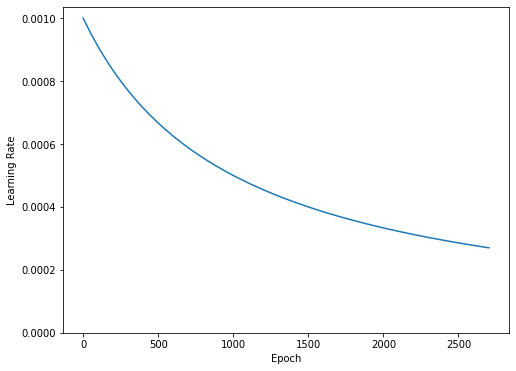

In [ ]:
step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')


###### Tensorboard 

In [ ]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]


In [ ]:

def compile_and_fit(model, name, optimizer=None, max_epochs=10000):
  if optimizer is None:
    optimizer = get_optimizer()

  # Compile model
 
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),#
                metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'
                  ])

  model.summary()

  history = model.fit(
    train_new_X,#X,
    train_new_y,#Y,#dataset,
    #steps_per_epoch = STEPS_PER_EPOCH,
    epochs = max_epochs,
    validation_data = (val_new_X, val_new_y),#dataset_val, 
    callbacks = get_callbacks(name),
    verbose = 0)
  return history

##### Tiny model

In [ ]:
#!pip install git+https://github.com/tensorflow/docs

from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

import pathlib
import tempfile
import shutil

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-vqxa8axf
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-vqxa8axf


In [ ]:
tiny_model = tf.keras.Sequential([
    layers.Dense(16, activation='relu', input_dim=29),#,input_shape=(FEATURES,)
    layers.Dense(1)#, activation='sigmoid'
])

In [ ]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [ ]:
size_histories = {}

In [ ]:
size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny')

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_188 (Dense)            (None, 16)                496       
_________________________________________________________________
dense_189 (Dense)            (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.9147,  binary_crossentropy:1017281600.0000,  loss:1017423168.0000,  val_accuracy:0.9110,  val_binary_crossentropy:825745.2500,  val_loss:821717.5000,  
....................................................................................................
Epoch: 100, accuracy:0.9307,  binary_crossentropy:574750.4375,  loss:574780.2500,  val_accuracy:0.9389,  val_binary_crossentropy:406264.7500,  val_loss:407518.4375,  
...........................................................................

(0.0, 750000.0)

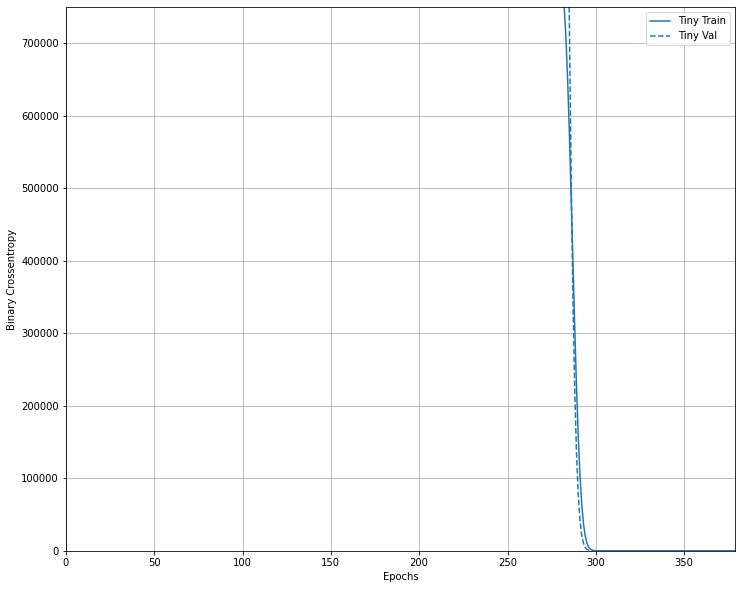

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=20)
plotter.plot(size_histories)
plt.ylim([0, 900000])

##### Small model

In [ ]:
small_model = tf.keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    layers.Dense(16, activation='relu', input_dim=29),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)#, activation='sigmoid'
])

In [ ]:
size_histories['Small'] = compile_and_fit(small_model, 'sizes/Small')

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 16)                496       
_________________________________________________________________
dense_153 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_154 (Dense)            (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.8955,  binary_crossentropy:166410944.0000,  loss:166454304.0000,  val_accuracy:0.7600,  val_binary_crossentropy:21400818.0000,  val_loss:21483326.0000,  
....................................................................................................
Epoch: 100, accuracy:0.9384,  binary_crossentropy:0.0950,  loss:0.0950,  val_accuracy:0.9652,  val_binary_cr

##### Medium model

In [ ]:
medium_model = tf.keras.Sequential([
    layers.Dense(30, activation='relu',  input_dim=29),
    layers.Dense(30, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(1)#, activation='sigmoid'
])


In [ ]:
size_histories['Medium']  = compile_and_fit(medium_model, "sizes/Medium")

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_155 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_156 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_157 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_158 (Dense)            (None, 1)                 31        
Total params: 2,821
Trainable params: 2,821
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.8966,  binary_crossentropy:23294272.0000,  loss:23300394.0000,  val_accuracy:0.5708,  val_binary_crossentropy:28400392.0000,  val_loss:28509882.0000,  
...........................................................................

##### Large model

In [ ]:
large_model = tf.keras.Sequential([
    layers.Dense(60, activation='relu',  input_dim = 29),
    layers.Dense(60, activation='relu'),
    layers.Dense(60, activation='relu'),
    layers.Dense(60, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
size_histories['large'] = compile_and_fit(large_model, "sizes/large")

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 60)                1860      
_________________________________________________________________
dense_62 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_63 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_64 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 61        
Total params: 12,901
Trainable params: 12,901
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4994: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'



Epoch: 0, accuracy:0.7871,  binary_crossentropy:72090512.0000,  loss:72107648.0000,  val_accuracy:0.1798,  val_binary_crossentropy:96354720.0000,  val_loss:96726192.0000,  
....................................................................................................
Epoch: 100, accuracy:0.9332,  binary_crossentropy:164147.1094,  loss:164143.7031,  val_accuracy:0.7777,  val_binary_crossentropy:549724.1875,  val_loss:551843.5000,  
....................................................................................................
Epoch: 200, accuracy:0.9384,  binary_crossentropy:0.0950,  loss:0.0950,  val_accuracy:0.9690,  val_binary_crossentropy:0.1552,  val_loss:0.1559,  
....................................................................................................
Epoch: 300, accuracy:0.9384,  binary_crossentropy:0.0950,  loss:0.0950,  val_accuracy:0.9690,  val_binary_crossentropy:0.1552,  val_loss:0.1560,  
..............................................................

##### Plot the training and validation losses

Text(0.5, 0, 'Epochs [Log Scale]')

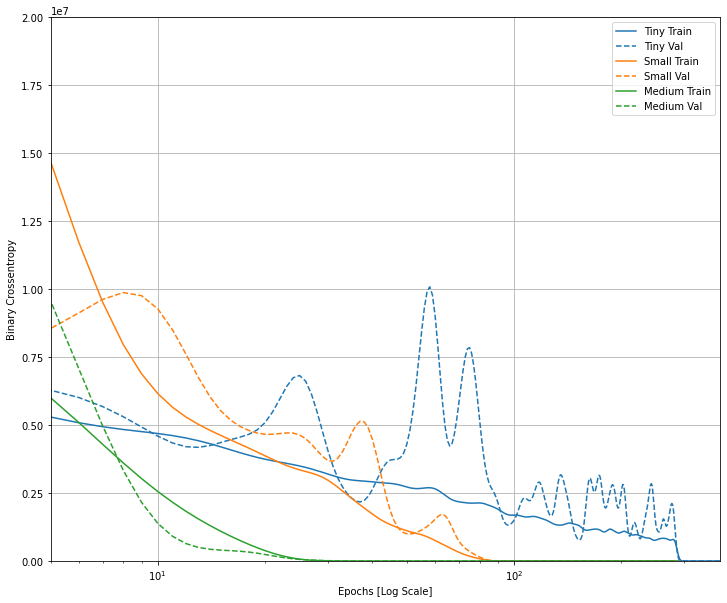

In [ ]:
plotter.plot(size_histories)
a = plt.xscale('log')
plt.xlim([5, max(plt.xlim())])
plt.ylim([0, 20000000])#[0.5, 0.7]
plt.xlabel("Epochs [Log Scale]")

In [ ]:
while True:pass

KeyboardInterrupt: ignored

## List of used sources :


> [Grid_search_hyperparameters](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/)


> [predict and test performance](https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/notebooks/Ch04_Feature_Engineering_and_Selection/Bonus%20-%20Classifying%20handwritten%20digits%20using%20Deep%20CNNs.ipynb)


> [probability class](https://androidkt.com/get-class-labels-from-predict-method-in-keras/)



> [Overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)



> [Overfitting Machine Learning Models](https://machinelearningmastery.com/overfitting-machine-learning-models/)








